In [15]:
import numpy as np
import pandas as pd

data = pd.read_csv("covid_19_india.csv")
print(data.shape)
data.head()

(2342, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [16]:
dataset = pd.read_csv("covid_19_data.csv")
print(dataset.shape)
dataset.head()

(29426, 8)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [17]:
maharashtra_y = []

tempsum_maharashtra = 0
for i in range(0, len(data)):
        if data.iloc[i, 3] == "Maharashtra": 
            tempsum_maharashtra = data.iloc[i, 8]
            maharashtra_y.append(tempsum_maharashtra)
print("Maharshtra cases up to 20/05/2020: {}".format(maharashtra_y[len(maharashtra_y) - 1]))
len(maharashtra_y)

Maharshtra cases up to 20/05/2020: 52667


79

In [18]:
india_y = []

tempsum_india = 0
for i in range(0, len(dataset)):
        if dataset.iloc[i, 3] == "India": 
            tempsum_india = dataset.iloc[i, 5]
            india_y.append(tempsum_india)
print("Maharshtra cases up to 20/05/2020: {}".format(india_y[len(india_y) - 1]))
len(india_y)

Maharshtra cases up to 20/05/2020: 144950.0


117

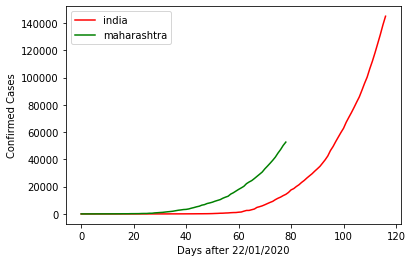

In [19]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 22/01/2020")

plt.plot(india_y, color='red', label='india')
plt.plot(maharashtra_y, color='green', label='maharashtra')
plt.legend()
plt.show()

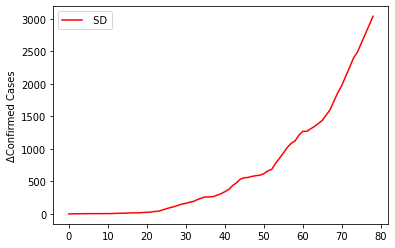

79


In [20]:
from scipy.signal import savgol_filter

deriv_maharashtra = savgol_filter(maharashtra_y, 9, 2, 1) #Polynomial degree is 2 since the function should look like a parabola

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_maharashtra, color='red', label=" SD")
plt.legend()
plt.show()
print(len(maharashtra_y))

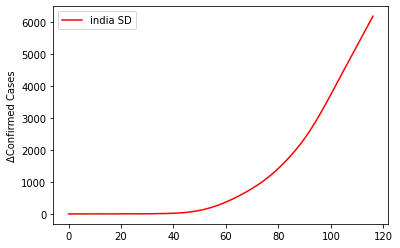

117

In [21]:
from scipy.signal import savgol_filter

deriv_india = savgol_filter(india_y, int(((len(india_y))+2)/3), 2, 1) #Polynomial degree is 2 since the function should look like a parabola
deriv_india = savgol_filter(deriv_india, int((len(india_y)+2)/5), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_india, color='red', label="india SD")
plt.legend()
plt.show()
len(deriv_india)

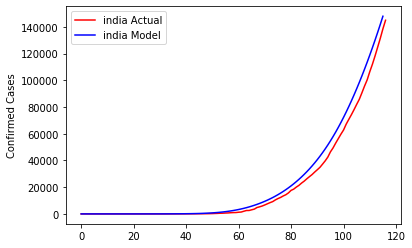

In [22]:
from scipy import integrate

india_y_pred = integrate.cumtrapz(deriv_india) 

plt.ylabel("Confirmed Cases")

plt.plot(india_y, color='red', label="india Actual")
plt.plot(india_y_pred, color='blue', label='india Model')
plt.legend()
plt.show()

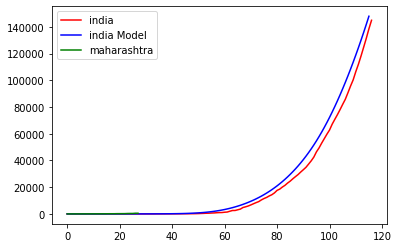

In [23]:
maharashtra_y = maharashtra_y[:28]
deriv_maharashtra = savgol_filter(maharashtra_y, 7, 2, 1)
deriv_maharashtra = savgol_filter(deriv_maharashtra, 9, 2, 0)

plt.plot(india_y, color='red', label='india')
plt.plot(india_y_pred, color='blue', label="india Model")
plt.plot(maharashtra_y, color='green', label='maharashtra')
plt.legend()
plt.show()

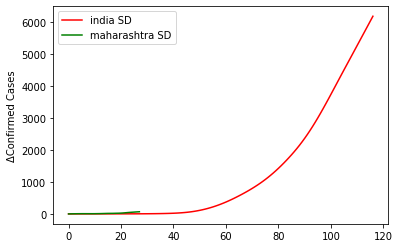

In [24]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_india, color='red', label='india SD')
plt.plot(deriv_maharashtra, color='green', label='maharashtra SD')
plt.legend()
plt.show()

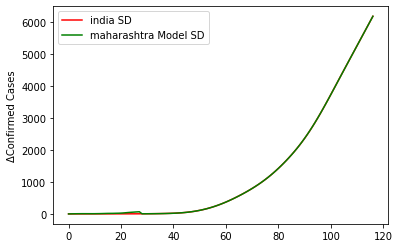

In [25]:
maharashtra_derv_model = np.roll(deriv_india, 1)
maharashtra_derv_model = savgol_filter(deriv_india, 19, 2, 0)
maharashtra_basic_model= []
for i in range(28):
    maharashtra_basic_model.append(deriv_maharashtra[i])

for i in range(28, len(maharashtra_derv_model)):
    maharashtra_basic_model.append(maharashtra_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_india, color='red', label="india SD")
plt.plot(maharashtra_basic_model, color='green', label='maharashtra Model SD')
plt.legend()
plt.show()

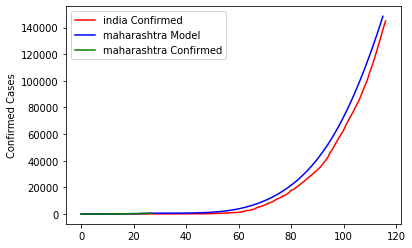

array([-3.31980519e-01,  1.37503865e+00,  4.72611317e+00,  9.32629870e+00,
        1.47779839e+01,  2.05969388e+01,  2.63814935e+01,  3.19752628e+01,
        3.72765152e+01,  4.26530612e+01,  4.89216914e+01,  5.65302257e+01,
        6.58510359e+01,  7.73766234e+01,  9.12705628e+01,  1.06691790e+02,
        1.22791589e+02,  1.40409400e+02,  1.60048624e+02,  1.82189007e+02,
        2.08839286e+02,  2.41907236e+02,  2.82231293e+02,  3.29252984e+02,
        3.82166659e+02,  4.40673230e+02,  5.04473609e+02,  5.38932528e+02,
        5.41728974e+02,  5.45071195e+02,  5.49050391e+02,  5.53768391e+02,
        5.59342168e+02,  5.65909531e+02,  5.73639797e+02,  5.82745911e+02,
        5.93493066e+02,  6.06211492e+02,  6.21313385e+02,  6.39311015e+02,
        6.60837762e+02,  6.86654113e+02,  7.17646666e+02,  7.54835536e+02,
        7.99380221e+02,  8.52575064e+02,  9.15832004e+02,  9.90669356e+02,
        1.07870477e+03,  1.18164358e+03,  1.30125900e+03,  1.43937210e+03,
        1.59784559e+03,  

In [26]:
maharashtra_basic_model_confirmed = integrate.cumtrapz(maharashtra_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(india_y, color='red', label='india Confirmed')
plt.plot(maharashtra_basic_model_confirmed, color='blue', label='maharashtra Model')
plt.plot(maharashtra_y, color='green', label='maharashtra Confirmed')
plt.legend()
plt.show()
maharashtra_basic_model_confirmed

In [34]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

start_pred = 1590451200
for i in range(94, len(maharashtra_basic_model_confirmed)):
    t = time.strftime('%Y-%m-%d', time.localtime(start_pred))
    pred = maharashtra_basic_model_confirmed[i]
    predictions.at[i-94, "Date"] = t
    predictions.at[i-94, "Predicted Cases"] = int(pred)
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
0,2020-05-26,52138
1,2020-05-27,55217
2,2020-05-28,58440
3,2020-05-29,61809
4,2020-05-30,65326
5,2020-05-31,68994
6,2020-06-01,72814
7,2020-06-02,76788
8,2020-06-03,80915
9,2020-06-04,85196
